# GRIP: The Sparks Foundation
# Data Science & Business Analytics
# Task 2: Prediction using Unsupervised Machine Learning
# Author: Mallika Gupta

In this task, from the given ‘Iris’ dataset, we have to predict the optimum number of clusters
and represent it visually.

# Importing the required libraries:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading the "iris" dataset:

In [35]:
iris = datasets.load_iris()
i = pd.DataFrame(iris.data, columns = iris.feature_names)
i.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# To check if any value is null:

In [36]:
pd.isnull(i).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

As all the values in the output are zero, no value is null.

# Finding the optimum number of clusters for K Means:

# Fitting different number of clusters to dataset & checking against inertia value:

In [37]:
x = i.iloc[:, :].values
SSE=[]
for cluster in range(1,20):
    kmeans=KMeans( init = 'k-means++', 
                    max_iter = 300, n_init = 19, random_state = 0, n_clusters=cluster)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
frame.head()

,Cluster,SSE
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182


# Plotting the graph:

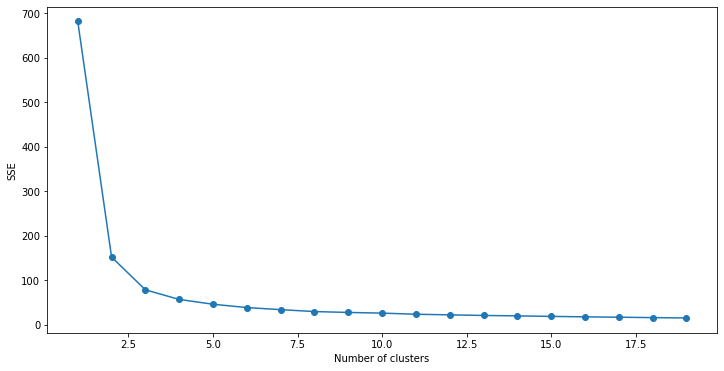

In [41]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
i_scaled= Scaler.fit_transform(x)

# In the above graph we get an 'Elbow' curve.

From the elbow curve we get the optimum value , i.e. 3 (When, within the cluster, sum of squares doesn't decrease significantly with every iteration we get the optimum value).

# After getting the value, creating the K Mean classifier:

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 19, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Plotting the clusters and their respective centroids:

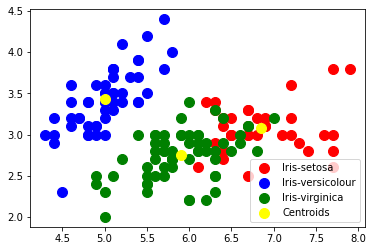

In [42]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()